In [55]:
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import tabulate
from IPython.display import display, HTML
from pandas.plotting import table 
from matplotlib.pyplot import figure
import dataframe_image as dfi
import random

In [22]:
connection = psycopg2.connect(
    database="postgres",
    user="postgres",
    password="password",
    host="127.0.0.1",
    port="5432"
)
db = connection.cursor(cursor_factory=psycopg2.extras.RealDictCursor)

In [7]:
def getAll(query):
    db.execute(query)
    return pd.DataFrame(data=db.fetchall())

In [29]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100
)
select avg(t.diff) as "sredni czas zycia tweeta"
from time_diffs t 
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "mleko.png")
display(df)

,sredni czas zycia tweeta
0,1 days 03:46:50.932274


In [37]:
# minimalny czas życia tweeta
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		u."name" as user_name,
		t."content"as t_content,
		least(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	join "user" u on t.user_id = u.id
	where t.reply_count > 100
)
select distinct t.diff, t.t_content, t.user_name
from time_diffs t
where t.diff is not null
order by t.diff
limit 10;
"""
df = getAll(sql)
# dfi.export(df, "mleko.png")
display(df)

,diff,t_content,user_name
0,0 days,"(1/16) \n\nFriends,\n\nSorry it's been a while...",Frink
1,0 days,1) Ability to monitor and protect our communit...,Gavin Newsom
2,0 days,1/\nThere will be no update today. \n\nAt 8:30...,Rebekah Jones #Vaccinated
3,0 days,"Again, not an expert. But again: EVERYONE IN T...",Alice Wu 伍思薇
4,0 days,En PAMI estamos recibiendo 16 mil llamados a e...,Luana Volnovich
5,0 days,I am at least the third Member from that room ...,Rep. Brad Schneider
6,0 days,"I called the Corona hotline, was on hold for 4...",sketchy lady
7,0 days,If we want to understand how powerful an oppon...,Nicholas A. Christakis
8,0 days,I have been identified as a contact of someone...,Tedros Adhanom Ghebreyesus
9,0 days,"I live in Seattle, I have all symptoms of COVI...",sketchy lady


In [38]:
# minimalny czas życia tweeta
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		u."name" as user_name,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	join "user" u on t.user_id = u.id
	where t.reply_count > 100
)
select distinct t.diff, t.t_content, t.user_name
from time_diffs t
where t.diff is not null
order by t.diff desc
limit 10;
"""
df = getAll(sql)
# dfi.export(df, "mleko.png")
display(df)

,diff,t_content,user_name
0,410 days 05:56:03,O trabalho do Governo Federal e do para trata...,SecomVc
1,397 days 01:59:14,The Italian airforce gives a big emotional lif...,Kathleen
2,373 days 04:41:26,"""The government seems complacent""\n\nLabour le...",BBC Politics
3,368 days 08:53:01,1/ Many of you ask me why I take the COVID-19 ...,Max Roser
4,358 days 16:43:15,"JUST NOW: Adam Silver, Rob Manfred, Roger Good...",Andy Slater
5,315 days 21:14:51,Spanish Flu. West Nile Virus. Zika. Ebola. All...,The White House 45 Archived
6,291 days 04:34:10,Bill Gates money does not give him permission ...,Diamond and Silk®
7,279 days 03:55:54,"""The government seems complacent""\n\nLabour le...",BBC Politics
8,270 days 23:25:08,With news of the smear campaign against Dr. Fa...,Banks
9,266 days 22:39:23,"In Joe Biden’s America your job is illegal, yo...",Matt Gaetz


In [39]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound >= 0.05
)
select avg(t.diff)
from time_diffs t
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "mleko.png")
display(df)

,avg
0,0 days 22:19:53.832716


In [40]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound > -0.05 and t.sentiment_compound < 0.05
)
select avg(t.diff)
from time_diffs t
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "mleko.png")
display(df)

,avg
0,0 days 19:12:28.365402


In [41]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound <= -0.05
)
select avg(t.diff)
from time_diffs t
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "mleko.png")
display(df)

,avg
0,1 days 14:06:39.876119


In [50]:
def plot(xs, ys, xlabel, ylabel, tittle, file_name, step=1, color="blue"):
    plt.figure(figsize=(12, 10))
    plt.grid(linestyle='-', linewidth=1)
    plt.plot(xs, ys, linestyle='--')
    plt.scatter(xs, ys)
    plt.ylim(0)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=14)
    plt.title(tittle, size=16)
    ax = plt.gca()
    plt.xticks(xs, rotation=60)
    ax.set_xticks(xs[::step])
    plt.savefig(f'mleko/{file_name}.png')
    plt.show()

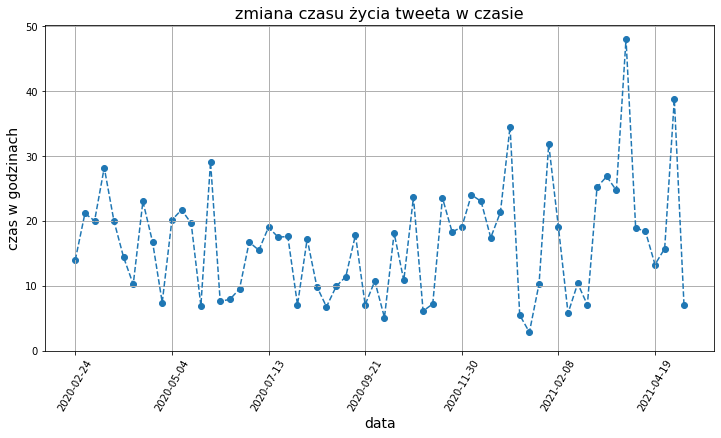

In [60]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100
)
select date_trunc('week', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""

df = getAll(sql)
plot(df['week'], df['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24)), 'data', 'czas w godzinach', 'zmiana czasu życia tweeta w czasie', 'a', 10)


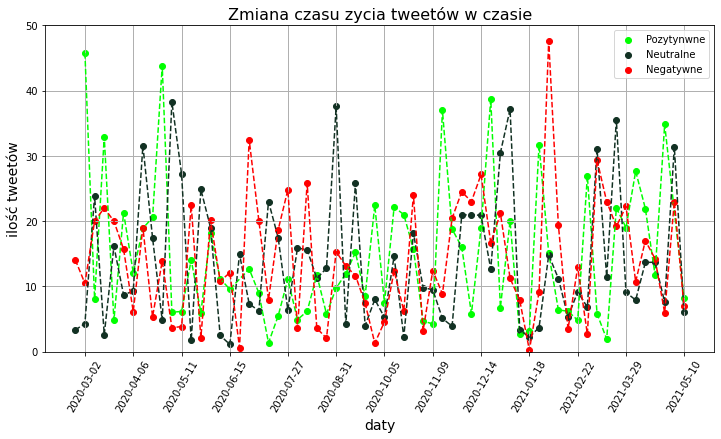

In [67]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound >= 0.05
)
select date_trunc('week', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""
df1 = getAll(sql)
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound > -0.05 and t.sentiment_compound < 0.05
)
select date_trunc('week', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""
df2 = getAll(sql)
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound <= -0.05
)
select date_trunc('week', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""
df3 = getAll(sql)

df1['avg'] = df1['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24))
df2['avg'] = df2['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24))
df3['avg'] = df3['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24))

plt.figure(figsize=(12, 6))
plt.grid(linestyle='-', linewidth=1)

plt.plot(df1['week'], df1['avg'], linestyle='--', color="#00ff00")
plt.scatter(df1['week'], df1['avg'], color="#00ff00", label='Pozytynwne')

plt.plot(df2['week'], df2['avg'], linestyle='--', color="#123123")
plt.scatter(df2['week'], df2['avg'], color="#123123", label='Neutralne')

plt.plot(df3['week'], df3['avg'], linestyle='--', color="#ff0000")
plt.scatter(df3['week'], df3['avg'], color="#ff0000", label='Negatywne')

plt.legend()
plt.ylim(0)
plt.savefig(f'mleko.png')
plt.ylabel('ilość tweetów', size=14)
plt.xlabel('daty', size=14)
plt.title('Zmiana czasu zycia tweetów w czasie', size=16)
ax = plt.gca()
plt.xticks(df1['week'], rotation=60)
ax.set_xticks(df1['week'][::5])
plt.show()
